In [1]:
import pandas as pd
import numpy as  np
from scipy import stats
import matplotlib as plt

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5254 entries, 0 to 5998
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      5254 non-null   object
 1   Dato                                       5254 non-null   object
 2   Fylke                                      5254 non-null   object
 3   Område                                     5254 non-null   object
 4   Kommune                                    5254 non-null   object
 5   Holdeplass_Fra                             5254 non-null   object
 6   Holdeplass_Til                             5254 non-null   object
 7   Linjetype                                  5254 non-null   object
 8   Linjefylke                                 5254 non-null   object
 9   Linjenavn                                  5254 non-null   object
 10  Linjeretning                        

In [6]:
df['Passasjerer_Ombord'].value_counts() 

 0     957
 1     590
 2     529
 3     445
 4     417
      ... 
 42      1
 40      1
-39      1
 35      1
-34      1
Name: Passasjerer_Ombord, Length: 70, dtype: int64

In [7]:
# Fjerne negativt antall passasjerer
df = df[df["Passasjerer_Ombord"] >= 0]

<AxesSubplot:xlabel='Klokkeslett', ylabel='Passasjerer_Ombord'>

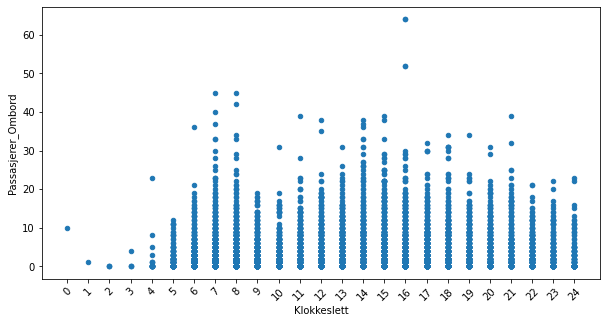

In [15]:
df['Klokkeslett'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].str[:2]
#df.isna().sum() # Check NA values, ingen NA values å ta vekk
df["Klokkeslett"].value_counts()
# Vi har en feil hvor noen har klokkeslett satt til ":"
df = df[df["Klokkeslett"] != ":"]
df["Klokkeslett"].value_counts()
# Klokken 25 gir heller ikke mening
df = df[df["Klokkeslett"] != "25"]
df["Klokkeslett"].value_counts()
df['Passasjerer_Ombord'] = df['Passasjerer_Ombord'].astype(int)
df["Klokkeslett"] = df["Klokkeslett"].astype(int)
df.plot(x="Klokkeslett", y="Passasjerer_Ombord", kind= 'scatter', 
        xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], rot=45, figsize=(10,5))

<AxesSubplot:>

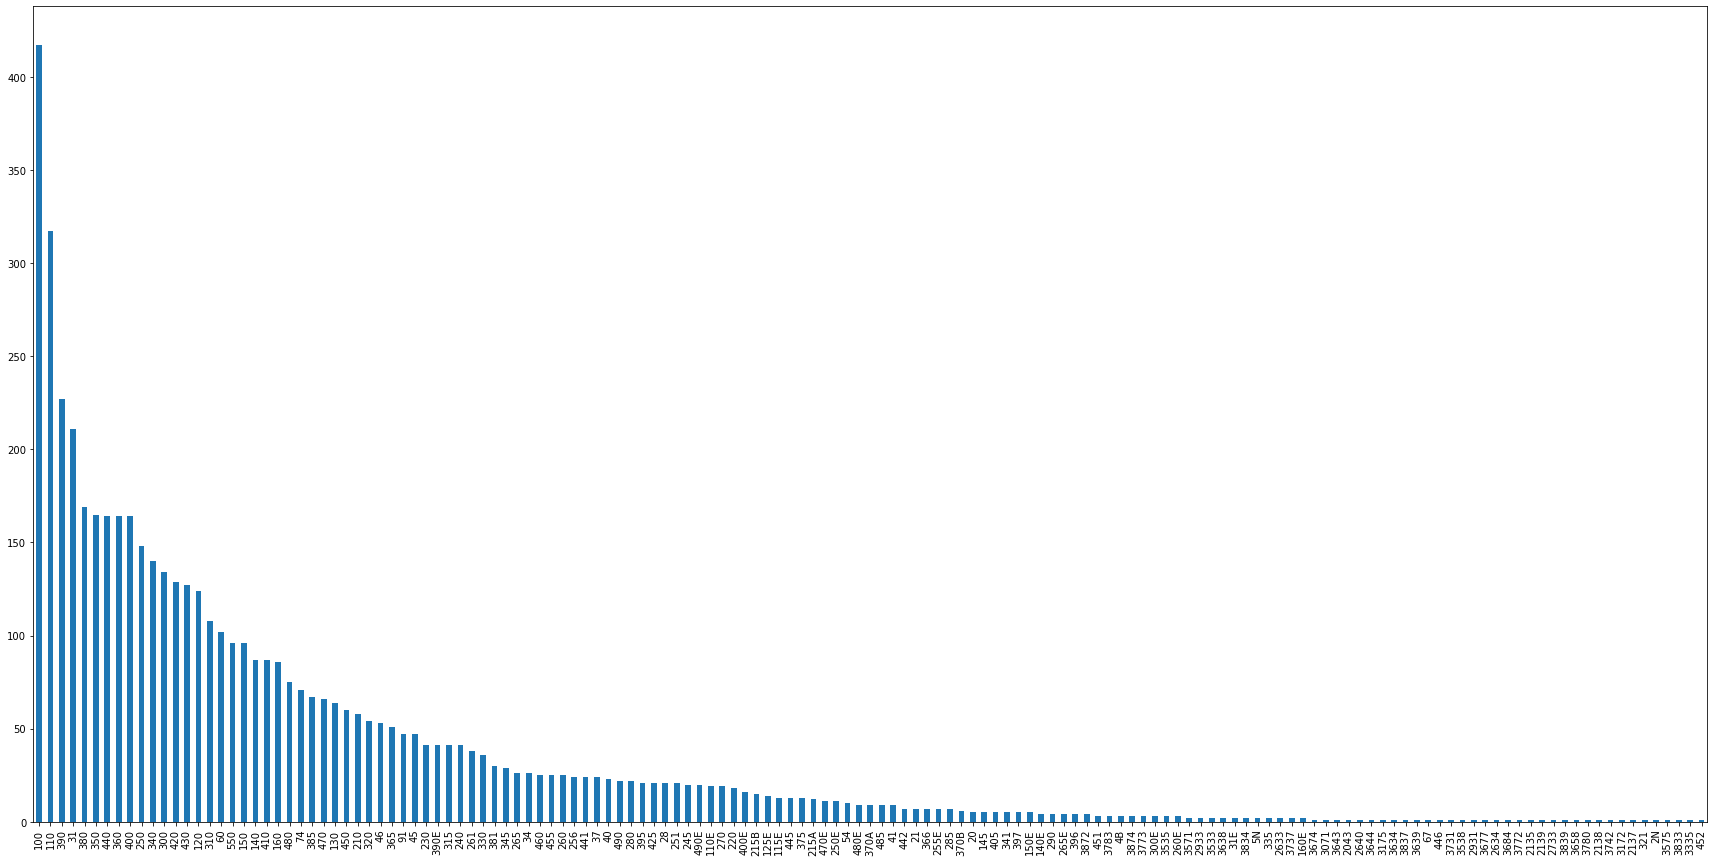

In [9]:
df['Linjenavn'].value_counts().plot(kind='bar', figsize =(30,15))

<AxesSubplot:>

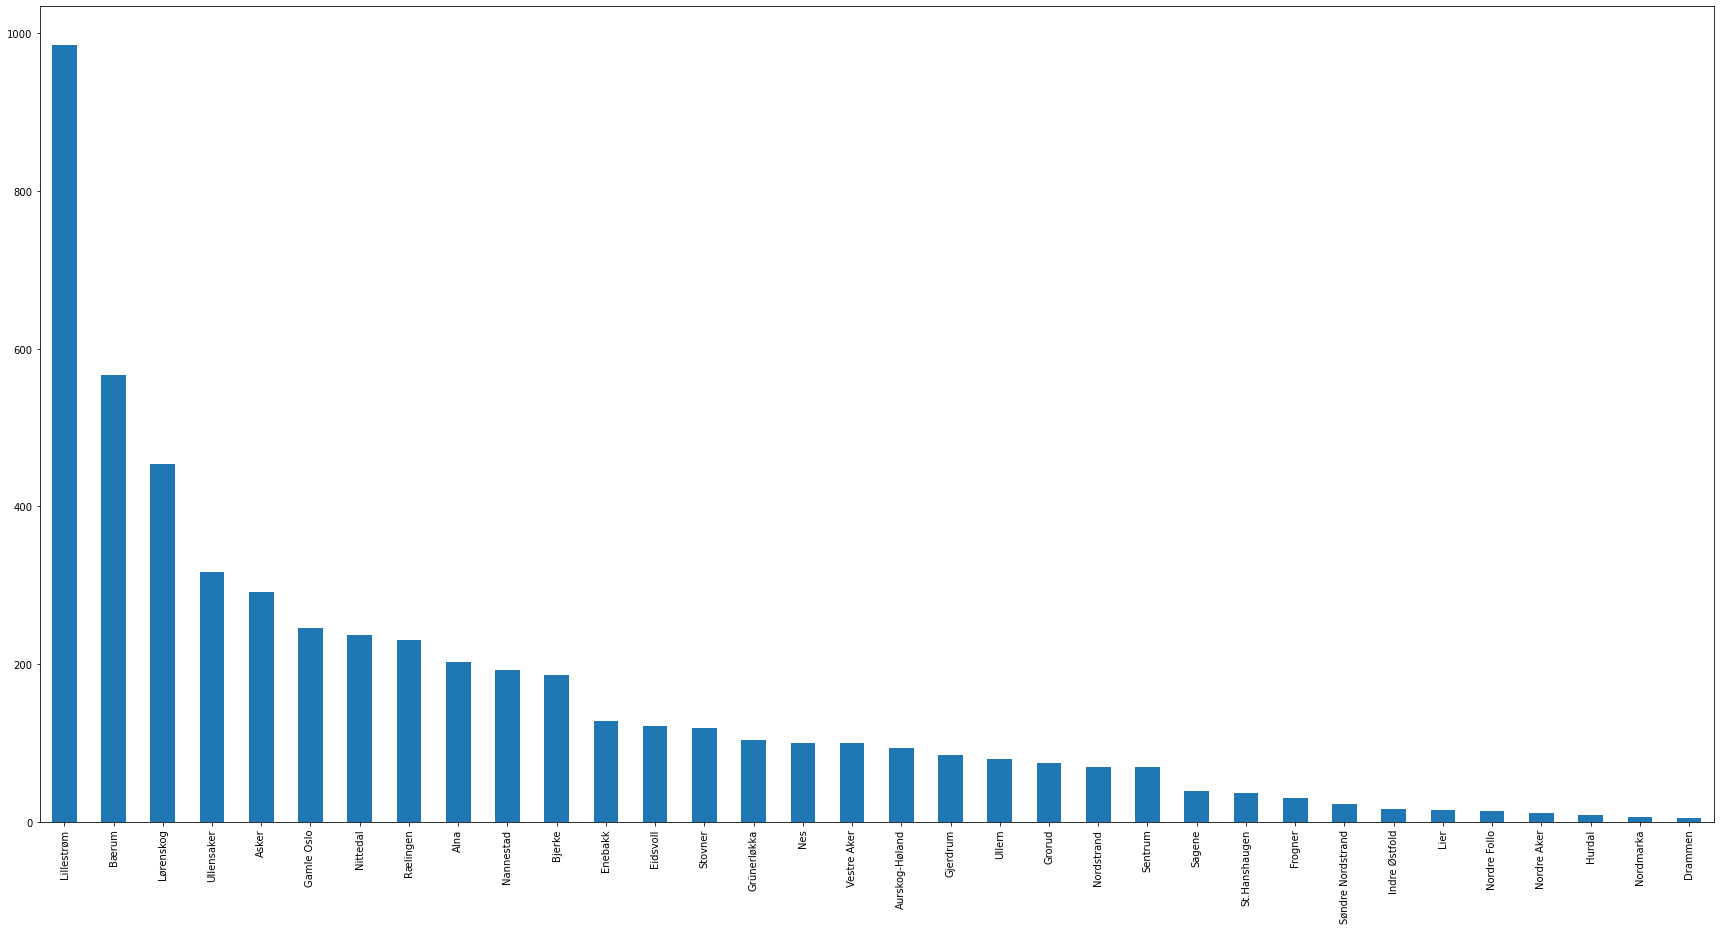

In [10]:
df['Kommune'].value_counts().plot(kind='bar', figsize =(30,15))

<AxesSubplot:ylabel='Kommune'>

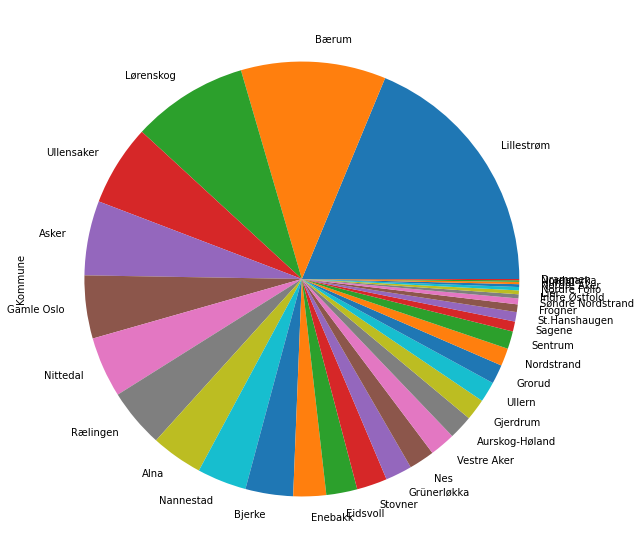

In [11]:
df['Kommune'].value_counts().plot(kind='pie', figsize =(10,10))

<AxesSubplot:>

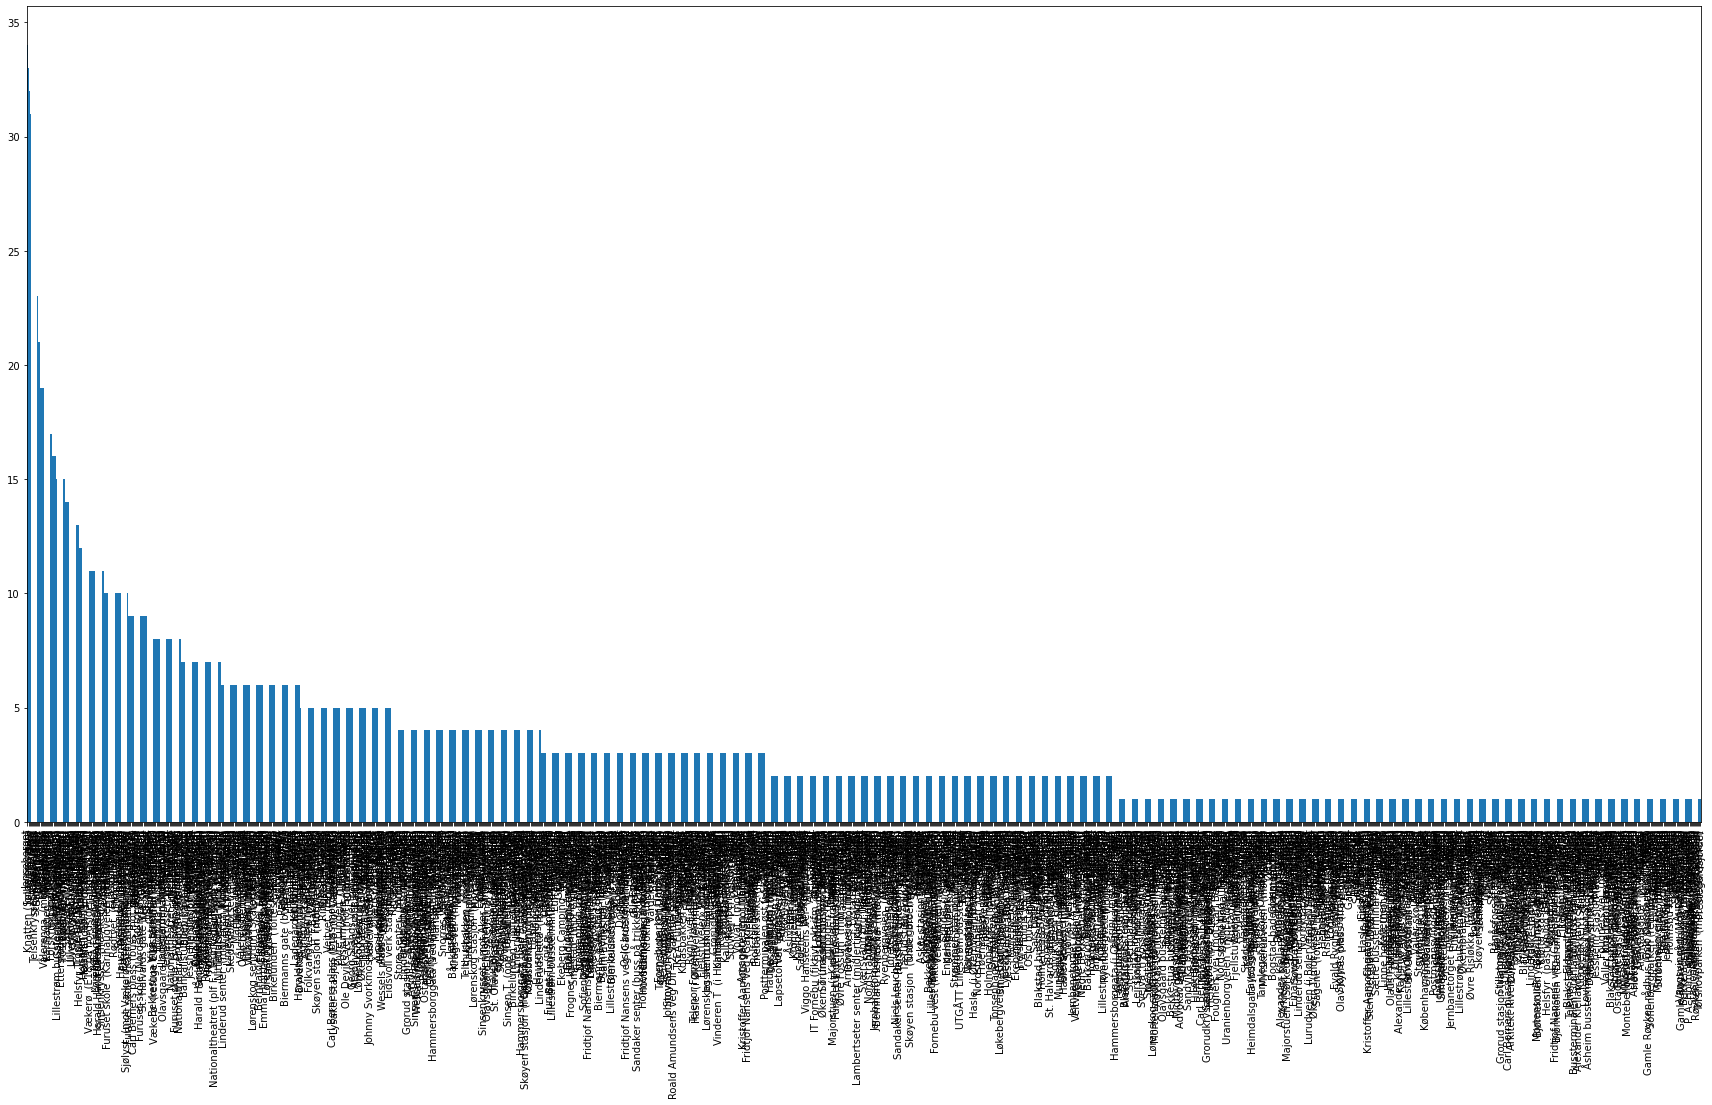

In [12]:
df['Holdeplass_Fra'].value_counts().plot(kind='bar', figsize =(30,15))

In [13]:
df.iloc[0]

TurId                                        15006-2020-08-10T10:24:00+02:00
Dato                                                              10/08/2020
Fylke                                                                  Viken
Område                                                                  Vest
Kommune                                                                Bærum
Holdeplass_Fra                                                   Nordliveien
Holdeplass_Til                                                     Tjernsmyr
Linjetype                                                              Lokal
Linjefylke                                                             Viken
Linjenavn                                                                150
Linjeretning                                                               0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra                            10:53:53
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra                             10:53:59